In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import sys
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

Let's start by defining the method for watershed segmentation

In [2]:
import sys
import cv2
import numpy
from scipy.ndimage import label

def segment_on_dt(a, img):
    border = cv2.dilate(img, None, iterations=5)
    border = border - cv2.erode(border, None)

    dt = cv2.distanceTransform(img, 2, 3)
    dt = ((dt - dt.min()) / (dt.max() - dt.min()) * 255).astype(numpy.uint8)
    _, dt = cv2.threshold(dt, 180, 255, cv2.THRESH_BINARY)
    lbl, ncc = label(dt)
    lbl = lbl * (255/ncc)
    # Completing the markers now.
    lbl[border == 255] = 255

    lbl = lbl.astype(numpy.int32)
    cv2.watershed(a, lbl)

    lbl[lbl == -1] = 0
    lbl = lbl.astype(numpy.uint8)
    return 255 - lbl

In [3]:
img = cv2.imread('/Users/shashwat/Downloads/ZSRJh.png')
gray = cv2.cvtColor( img,cv2.cv.CV_BGR2GRAY );

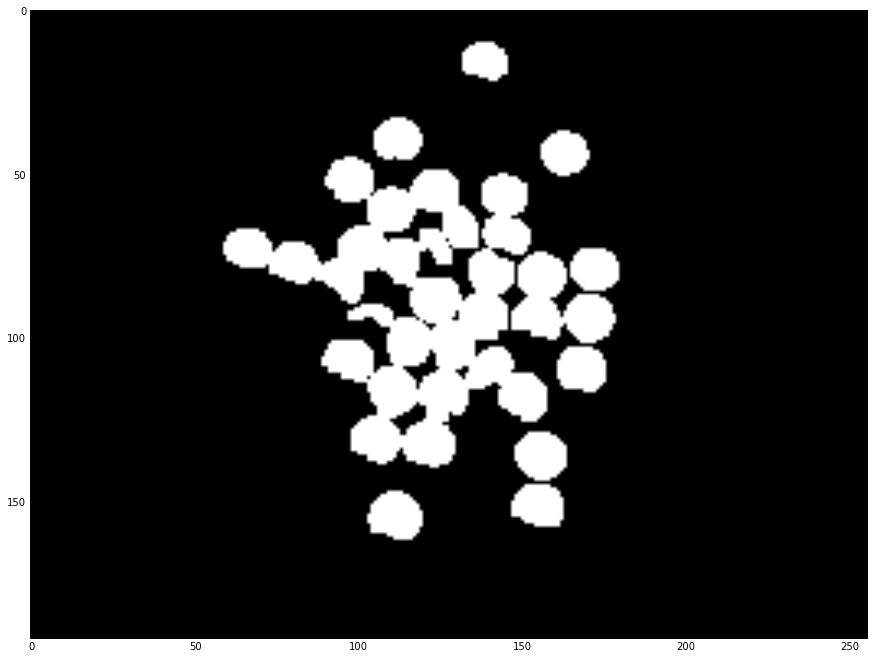

In [4]:
plt.imshow(img)

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
_, img_bin = cv2.threshold(img_gray, 0, 255,
        cv2.THRESH_OTSU)
img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN,
        numpy.ones((3, 3), dtype=int))

result = segment_on_dt(img, img_bin)
cv2.imshow(result)

TypeError: Required argument 'mat' (pos 2) not found